# Pitch Histogams
## Pitch Speed

In [1]:
pip install kaleido

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import numpy as np
import json

In [2]:
# Read Data
hits_folder_path = '/Users/tiffanynguyen/wsd-data/wsd-hits'
no_hits_folder_path = '/Users/tiffanynguyen/wsd-data/wsd-nohit'
data = []

for filename in os.listdir(hits_folder_path):
    if filename.endswith('.jsonl'):
        file_path = os.path.join(hits_folder_path, filename)
        with open(file_path, 'r') as json_file:
            data.append(json.load(json_file))

for filename in os.listdir(no_hits_folder_path):
    if filename.endswith('.jsonl'):
        file_path = os.path.join(no_hits_folder_path, filename)
        with open(file_path, 'r') as json_file:
            data.append(json.load(json_file))

In [3]:
# Get Pitch Types
pitch_type_data = []
pitch_type_data = [cur_data['summary_acts']['pitch']['type'] for cur_data in data if cur_data['summary_acts']['pitch']['type']]
pitch_type_types = list(set(pitch_type_data))
print(pitch_type_types)

['Sinker', 'Cutter', 'Curveball', 'Changeup', 'Slider', 'FourSeamFastball']


In [4]:
pitch_speed = [[] for _ in range(len(pitch_type_types))]

for cur_data in data:
    if(cur_data['summary_acts']['pitch']['type'] and cur_data['summary_acts']['pitch']['speed']['mph']):
        index = pitch_type_types.index(cur_data['summary_acts']['pitch']['type'])
        pitch_speed[index].append(cur_data['summary_acts']['pitch']['speed']['mph'])

In [5]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly

In [6]:
plotly.offline.init_notebook_mode(connected=True)

In [7]:
# Calculate the minimum and maximum speed
min_speed = min(min(speed) for speed in pitch_speed)
max_speed = max(max(speed) for speed in pitch_speed)

# Create subplots
fig = make_subplots(rows=len(pitch_type_types), cols=1, subplot_titles=pitch_type_types)

# Add histograms to subplots
for i in range(len(pitch_type_types)):
    hist = go.Histogram(
        x=pitch_speed[i],
        nbinsx=6,
        marker_color='red',
        marker_line_color='black',
        marker_line_width=1
    )

    fig.add_trace(hist, row=i+1, col=1)

    # Update x and y axis labels for each subplot
    fig.update_xaxes(title_text="Speed (mph)", row=i+1, col=1)
    fig.update_yaxes(title_text="Frequency", row=i+1, col=1)

# Update layout
fig.update_layout(
    height=1000,  # Adjust height as needed
    width=500,   # Adjust width as needed
    title_text='Pitch Initial Speed Frequency',
    showlegend=False
)
fig.show()

In [8]:
# Save the plot as a PNG file
# fig.write_image("Pitch Initial Speed Frequency.png", engine='kaleido')

In [9]:
# Overlay
fig = go.Figure()
for i in range(len(pitch_type_types)):
    fig.add_trace(go.Histogram(x=pitch_speed[i], name=pitch_type_types[i]))

# Overlay both histograms
fig.update_layout(barmode='overlay', title_text='Pitch Initial Speed Frequency')
fig.update_xaxes(title_text="Speed (mph)")
fig.update_yaxes(title_text="Frequency")

# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

# fig.write_image("Pitch Initial Speed Frequency Histogram.png", engine='kaleido')

## Pitch Spin Histogram

In [10]:
pitch_spin = [[] for _ in range(len(pitch_type_types))]

for cur_data in data:
    if(cur_data['summary_acts']['pitch']['type'] and cur_data['summary_acts']['pitch']['spin']['rpm']):
        index = pitch_type_types.index(cur_data['summary_acts']['pitch']['type'])
        pitch_speed[index].append(cur_data['summary_acts']['pitch']['spin']['rpm'])

In [11]:
# Overlay
fig = go.Figure()
for i in range(len(pitch_type_types)):
    fig.add_trace(go.Histogram(x=pitch_speed[i], name=pitch_type_types[i]))
    
# Overlay both histograms
fig.update_layout(barmode='overlay', title_text='Pitch Initial Spin Frequency')
fig.update_xaxes(title_text="Spin (rpm)")
fig.update_yaxes(title_text="Frequency")

# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

# fig.write_image("Pitch Initial Spin Frequency Histogram.png", engine='kaleido')

## Pitch Info by Result
### Speed Based on Result

In [12]:
import pandas as pd
import plotly.express as px

In [13]:
speed_result_list = []

for cur_data in data:
    speed = cur_data['summary_acts']['pitch']['speed']['mph']
    result = cur_data['summary_acts']['pitch']['result']
    
    if speed != "" and result != "":
        cur_row = {
            "Speed": speed,
            "Result": result
        }
        speed_result_list.append(cur_row)

# Create DataFrame from the list of dictionaries
speed_result_df = pd.DataFrame(speed_result_list)

display(speed_result_df)

,Speed,Result
0,94.0,Ball
1,92.0,Strike
2,84.0,HitIntoPlay
3,92.0,HitIntoPlay
4,90.0,Strike
...,...,...
1244,88.0,Ball
1245,90.0,Ball
1246,94.0,Strike
1247,92.0,Ball


In [14]:
fig = px.histogram(speed_result_df, x="Speed", color="Result", title="Pitch Speed Distribution by Result")
fig.update_xaxes(title_text="Speed (mph)")
fig.show()

### Spin Based on Result

In [15]:
spin_result_list = []

for cur_data in data:
    spin = cur_data['summary_acts']['pitch']['spin']['rpm']
    result = cur_data['summary_acts']['pitch']['result']
    
    if spin != "" and result != "":
        cur_row = {
            "Spin": spin,
            "Result": result
        }
        spin_result_list.append(cur_row)

# Create DataFrame from the list of dictionaries
spin_result_df = pd.DataFrame(spin_result_list)

display(spin_result_df)

,Spin,Result
0,260.0,Ball
1,2310.0,Strike
2,2720.0,HitIntoPlay
3,2290.0,HitIntoPlay
4,2240.0,Strike
...,...,...
1244,2690.0,Ball
1245,2280.0,Ball
1246,2280.0,Strike
1247,2310.0,Ball


In [16]:
fig = px.histogram(spin_result_df, x="Spin", color="Result", title="Pitch Spin Distribution by Result")
fig.update_xaxes(title_text="Spin (rpm)")
fig.show()

# Pitch Density Heatmap
## Pitch type and Result

In [17]:
import plotly.express as px
import pandas as pd

In [18]:
pitch_type_data = []
pitch_result_data = []
for cur_data in data:
    if(cur_data['summary_acts']['pitch']['type'] and cur_data['summary_acts']['pitch']['result']):
        pitch_type_data.append(cur_data['summary_acts']['pitch']['type'])
        pitch_result_data.append(cur_data['summary_acts']['pitch']['result'])

In [19]:
pitch_type_types = list(set(pitch_type_data))
pitch_result_types = list(set(pitch_result_data))
print("Pitch Types:", pitch_type_types)
print("Pitch Results:", pitch_result_types)

Pitch Types: ['Sinker', 'Cutter', 'Curveball', 'Changeup', 'Slider', 'FourSeamFastball']
Pitch Results: ['Ball', 'Strike', 'HitIntoPlay']


In [20]:
pitch_matrix = np.zeros([len(pitch_type_types), len(pitch_result_types)])
for i in range(len(pitch_type_data)):
    pitch_matrix[pitch_type_types.index(pitch_type_data[i])][pitch_result_types.index(pitch_result_data[i])] += 1
# print(pitch_matrix)

#convert to dictionary
type_result_dict = {'Pitch Type': pitch_type_types}
for i, outcome in enumerate(pitch_result_types):
    type_result_dict[outcome] = pitch_matrix[:, i].tolist()
print(type_result_dict)

#Make dataframe
type_result_df = pd.DataFrame(type_result_dict)
display(type_result_df)
# Melt the DataFrame to have a column for the pitch type and its corresponding values
melted_df = pd.melt(type_result_df, id_vars='Pitch Type', var_name='Outcome', value_name='Count')
print(melted_df)

{'Pitch Type': ['Sinker', 'Cutter', 'Curveball', 'Changeup', 'Slider', 'FourSeamFastball'], 'Ball': [40.0, 13.0, 17.0, 11.0, 31.0, 7.0], 'Strike': [52.0, 9.0, 19.0, 12.0, 36.0, 16.0], 'HitIntoPlay': [14.0, 2.0, 3.0, 8.0, 10.0, 10.0]}


,Pitch Type,Ball,Strike,HitIntoPlay
0,Sinker,40.0,52.0,14.0
1,Cutter,13.0,9.0,2.0
2,Curveball,17.0,19.0,3.0
3,Changeup,11.0,12.0,8.0
4,Slider,31.0,36.0,10.0
5,FourSeamFastball,7.0,16.0,10.0


          Pitch Type      Outcome  Count
0             Sinker         Ball   40.0
1             Cutter         Ball   13.0
2          Curveball         Ball   17.0
3           Changeup         Ball   11.0
4             Slider         Ball   31.0
5   FourSeamFastball         Ball    7.0
6             Sinker       Strike   52.0
7             Cutter       Strike    9.0
8          Curveball       Strike   19.0
9           Changeup       Strike   12.0
10            Slider       Strike   36.0
11  FourSeamFastball       Strike   16.0
12            Sinker  HitIntoPlay   14.0
13            Cutter  HitIntoPlay    2.0
14         Curveball  HitIntoPlay    3.0
15          Changeup  HitIntoPlay    8.0
16            Slider  HitIntoPlay   10.0
17  FourSeamFastball  HitIntoPlay   10.0


In [21]:
# Create a heatmap with Plotly Express
fig = px.imshow(melted_df.pivot(index='Pitch Type', columns='Outcome', values='Count'),
                x=melted_df['Outcome'].unique(),
                y=melted_df['Pitch Type'].unique(),
                labels=dict(x='Outcome', y='Pitch Type', color='Count'),
                title='Pitch Type Outcome Counts',
                width=450,
                height=500, 
                text_auto=True)

# Show the plot
fig.show()

# fig.write_image("Pitch Type Outcomes.png", engine='kaleido')

## Pitch Type and Action

In [22]:
pitch_type_data = []
pitch_action_data = []
for cur_data in data:
    if(cur_data['summary_acts']['pitch']['type'] and cur_data['summary_acts']['pitch']['action']):
        pitch_type_data.append(cur_data['summary_acts']['pitch']['type'])
        pitch_action_data.append(cur_data['summary_acts']['pitch']['action'])

In [23]:
pitch_type_types = list(set(pitch_type_data))
pitch_action_types = list(set(pitch_action_data))
print("Pitch Types:", pitch_type_types)
print("Pitch Action:", pitch_action_types)

Pitch Types: ['Sinker', 'Cutter', 'Curveball', 'Changeup', 'Slider', 'FourSeamFastball']
Pitch Action: ['Foul', 'BallInDirt', 'Blocked', 'Called', 'FoulTip', 'HitByPitch']


In [24]:
pitch_type_action_matrix = np.zeros([len(pitch_type_types), len(pitch_action_types)])
for i in range(len(pitch_type_data)):
    pitch_type_action_matrix[pitch_type_types.index(pitch_type_data[i])][pitch_action_types.index(pitch_action_data[i])] += 1
# print(pitch_type_action_matrix)

#convert to dictionary
type_action_dict = {'Pitch Type': pitch_type_types}
for i, outcome in enumerate(pitch_action_types):
    type_action_dict[outcome] = pitch_type_action_matrix[:, i].tolist()
print(type_action_dict)

#Make dataframe
type_action_df = pd.DataFrame(type_action_dict)
# print(type_action_df)

# Melt the DataFrame to have a column for the pitch type and its corresponding values
melted_type_action_df = pd.melt(type_action_df, id_vars='Pitch Type', var_name='Pitch Action', value_name='Count')
print(melted_type_action_df)

{'Pitch Type': ['Sinker', 'Cutter', 'Curveball', 'Changeup', 'Slider', 'FourSeamFastball'], 'Foul': [19.0, 3.0, 3.0, 1.0, 12.0, 5.0], 'BallInDirt': [0.0, 0.0, 3.0, 0.0, 2.0, 0.0], 'Blocked': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0], 'Called': [58.0, 17.0, 21.0, 20.0, 40.0, 16.0], 'FoulTip': [2.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'HitByPitch': [2.0, 0.0, 0.0, 0.0, 1.0, 0.0]}
          Pitch Type Pitch Action  Count
0             Sinker         Foul   19.0
1             Cutter         Foul    3.0
2          Curveball         Foul    3.0
3           Changeup         Foul    1.0
4             Slider         Foul   12.0
5   FourSeamFastball         Foul    5.0
6             Sinker   BallInDirt    0.0
7             Cutter   BallInDirt    0.0
8          Curveball   BallInDirt    3.0
9           Changeup   BallInDirt    0.0
10            Slider   BallInDirt    2.0
11  FourSeamFastball   BallInDirt    0.0
12            Sinker      Blocked    0.0
13            Cutter      Blocked    0.0
14         Curveball     

In [25]:
# Create a heatmap with Plotly Express
fig = px.imshow(melted_type_action_df.pivot(index='Pitch Type', columns='Pitch Action', values='Count'),
                x=melted_type_action_df['Pitch Action'].unique(),
                y=melted_type_action_df['Pitch Type'].unique(),
                labels=dict(x='Pitch Action', y='Pitch Type', color='Count'),
                title='Pitch Type Action Counts',
                width=450,
                height=500, 
                text_auto=True)

# Show the plot
fig.show()

# fig.write_image("Pitch Type Action Counts.png", engine='kaleido')

## Pitch Type By General Game Info
### Pitch Type By Inning Number

In [26]:
pitch_type_data = []
inning_num_data = []
for cur_data in data:
    if(cur_data['summary_acts']['pitch']['type'] and cur_data['summary_score']['runs']['innings']):
        pitch_type_data.append(cur_data['summary_acts']['pitch']['type'])
        inning_num_data.append(len(cur_data['summary_score']['runs']['innings']))

In [27]:
pitch_type_types = list(set(pitch_type_data))
inning_num_types = list(set(inning_num_data))
print("Pitch Types:", pitch_type_types)
print("Innings:", inning_num_types)

Pitch Types: ['Sinker', 'Cutter', 'Curveball', 'Changeup', 'Slider', 'FourSeamFastball']
Innings: [1, 2, 3, 4, 5, 6, 7, 8, 9]


In [28]:
pitch_type_inning_matrix = np.zeros([len(pitch_type_types), len(inning_num_types)])
for i in range(len(pitch_type_data)):
    pitch_type_inning_matrix[pitch_type_types.index(pitch_type_data[i])][inning_num_types.index(inning_num_data[i])] += 1

#convert to dictionary
pitch_type_inning_dict = {'Pitch Type': pitch_type_types}
for i, outcome in enumerate(inning_num_types):
    pitch_type_inning_dict[outcome] = pitch_type_inning_matrix[:, i].tolist()
display(pitch_type_inning_dict)

#Make dataframe
pitch_type_inning_df = pd.DataFrame(pitch_type_inning_dict)

# Melt the DataFrame to have a column for the pitch type and its corresponding values
melted_pitch_type_inning_df = pd.melt(pitch_type_inning_df, id_vars='Pitch Type', var_name='Inning Num', value_name='Count')
print(melted_pitch_type_inning_df)

{'Pitch Type': ['Sinker',
  'Cutter',
  'Curveball',
  'Changeup',
  'Slider',
  'FourSeamFastball'],
 1: [10.0, 2.0, 6.0, 3.0, 4.0, 2.0],
 2: [16.0, 6.0, 7.0, 1.0, 4.0, 1.0],
 3: [26.0, 7.0, 14.0, 2.0, 6.0, 5.0],
 4: [7.0, 5.0, 3.0, 0.0, 7.0, 10.0],
 5: [14.0, 1.0, 0.0, 3.0, 22.0, 2.0],
 6: [7.0, 0.0, 2.0, 11.0, 12.0, 0.0],
 7: [0.0, 0.0, 3.0, 7.0, 14.0, 6.0],
 8: [25.0, 3.0, 2.0, 4.0, 2.0, 3.0],
 9: [1.0, 0.0, 2.0, 0.0, 6.0, 4.0]}

          Pitch Type Inning Num  Count
0             Sinker          1   10.0
1             Cutter          1    2.0
2          Curveball          1    6.0
3           Changeup          1    3.0
4             Slider          1    4.0
5   FourSeamFastball          1    2.0
6             Sinker          2   16.0
7             Cutter          2    6.0
8          Curveball          2    7.0
9           Changeup          2    1.0
10            Slider          2    4.0
11  FourSeamFastball          2    1.0
12            Sinker          3   26.0
13            Cutter          3    7.0
14         Curveball          3   14.0
15          Changeup          3    2.0
16            Slider          3    6.0
17  FourSeamFastball          3    5.0
18            Sinker          4    7.0
19            Cutter          4    5.0
20         Curveball          4    3.0
21          Changeup          4    0.0
22            Slider          4    7.0
23  FourSeamFastball          4   10.0
24            Sinker     

In [29]:
# Create a heatmap with Plotly Express
fig = px.imshow(melted_pitch_type_inning_df.pivot(index='Pitch Type', columns='Inning Num', values='Count'),
                x=melted_pitch_type_inning_df['Inning Num'].unique(),
                y=melted_pitch_type_inning_df['Pitch Type'].unique(),
                labels=dict(x='Inning Num', y='Pitch Type', color='Count'),
                title='Pitch Type by Inning Number Counts',
                width=700,
                height=500, 
                text_auto=True)

# Show the plot
fig.show()

# fig.write_image("Pitch Type Action Counts.png", engine='kaleido')

### Pitch Type By Outs in Inning

In [30]:
pitch_type_data = []
inning_outs_data = []
for cur_data in data:
    if(cur_data['summary_acts']['pitch']['type'] and cur_data['summary_score']['outs']['inning']):
        pitch_type_data.append(cur_data['summary_acts']['pitch']['type'])
        inning_outs_data.append(cur_data['summary_score']['outs']['inning'])

In [31]:
pitch_type_types = list(set(pitch_type_data))
inning_outs_types = list(set(inning_outs_data))
print("Pitch Types:", pitch_type_types)
print("Innings Outs:", inning_outs_types)

Pitch Types: ['Sinker', 'Cutter', 'Curveball', 'Changeup', 'Slider', 'FourSeamFastball']
Innings Outs: [1, 2]


In [32]:
pitch_type_inning_out_matrix = np.zeros([len(pitch_type_types), len(inning_outs_types)])
for i in range(len(pitch_type_data)):
    pitch_type_inning_out_matrix[pitch_type_types.index(pitch_type_data[i])][inning_outs_types.index(inning_outs_data[i])] += 1

#convert to dictionary
pitch_type_inning_out_dict = {'Pitch Type': pitch_type_types}
for i, outcome in enumerate(inning_outs_types):
    pitch_type_inning_out_dict[outcome] = pitch_type_inning_out_matrix[:, i].tolist()
# display(pitch_type_inning_out_dict)

#Make dataframe
pitch_type_inning_out_df = pd.DataFrame(pitch_type_inning_out_dict)

# Melt the DataFrame to have a column for the pitch type and its corresponding values
melted_pitch_type_inning_out_df = pd.melt(pitch_type_inning_out_df, id_vars='Pitch Type', var_name='Inning Outs', value_name='Count')
display(melted_pitch_type_inning_out_df)

,Pitch Type,Inning Outs,Count
0,Sinker,1,31.0
1,Cutter,1,5.0
2,Curveball,1,13.0
3,Changeup,1,12.0
4,Slider,1,27.0
5,FourSeamFastball,1,9.0
6,Sinker,2,36.0
7,Cutter,2,8.0
8,Curveball,2,15.0
9,Changeup,2,9.0


In [33]:
# Create a heatmap with Plotly Express
fig = px.imshow(melted_pitch_type_inning_out_df.pivot(index='Pitch Type', columns='Inning Outs', values='Count'),
                x=melted_pitch_type_inning_out_df['Inning Outs'].unique(),
                y=melted_pitch_type_inning_out_df['Pitch Type'].unique(),
                labels=dict(x='Inning Outs', y='Pitch Type', color='Count'),
                title='Pitch Type by Outs in Inning Count',
                width=400,
                height=500, 
                text_auto=True)

# Show the plot
fig.show()

In [34]:
#Calculate percent (within that column, ex: so what % of pitches when there was 1 out is a slider)
num_one_out = melted_pitch_type_inning_out_df.loc[melted_pitch_type_inning_out_df['Inning Outs'] == 1, 'Count'].sum()
num_two_out = melted_pitch_type_inning_out_df.loc[melted_pitch_type_inning_out_df['Inning Outs'] == 2, 'Count'].sum()
print(num_one_out, num_two_out)
melted_pitch_type_inning_out_df['Percent'] = np.where(melted_pitch_type_inning_out_df['Inning Outs'] == 5, melted_pitch_type_inning_out_df['Count'] / num_one_out, melted_pitch_type_inning_out_df['Count'] / num_two_out)
display(melted_pitch_type_inning_out_df)

97.0 116.0


,Pitch Type,Inning Outs,Count,Percent
0,Sinker,1,31.0,0.267241
1,Cutter,1,5.0,0.043103
2,Curveball,1,13.0,0.112069
3,Changeup,1,12.0,0.103448
4,Slider,1,27.0,0.232759
5,FourSeamFastball,1,9.0,0.077586
6,Sinker,2,36.0,0.310345
7,Cutter,2,8.0,0.068966
8,Curveball,2,15.0,0.129310
9,Changeup,2,9.0,0.077586


# Predictors
## Pitch Type Classification

In [35]:
# Get intial speed, spin, and pitch type as parallel lists
pitch_type_data = []
pitch_speed_data = []
pitch_spin_data = []

for cur_data in data:
    if(cur_data['summary_acts']['pitch']['type'] and cur_data['summary_acts']['pitch']['speed']['mph'] and cur_data['summary_acts']['pitch']['spin']['rpm']):
        pitch_type_data.append(cur_data['summary_acts']['pitch']['type'])
        pitch_speed_data.append(cur_data['summary_acts']['pitch']['speed']['mph'])
        pitch_spin_data.append(cur_data['summary_acts']['pitch']['spin']['rpm'])

In [36]:
combined_speed_spin = [list(item) for item in zip(pitch_speed_data, pitch_spin_data)]
print(len(combined_speed_spin))
print(len(pitch_type_data))

309
309


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
#divide data
train_x, test_x, train_y, test_y = train_test_split(combined_speed_spin, pitch_type_data, test_size=0.2, random_state=42)

In [39]:
# Feature scaling
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

In [40]:
# Initialize and train the classifier
classifier = RandomForestClassifier(random_state=41) #41
classifier.fit(train_x_scaled, train_y)

RandomForestClassifier(random_state=41)

In [41]:
pred_y = classifier.predict(test_x_scaled)

In [42]:
accuracy = accuracy_score(test_y, pred_y)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.71


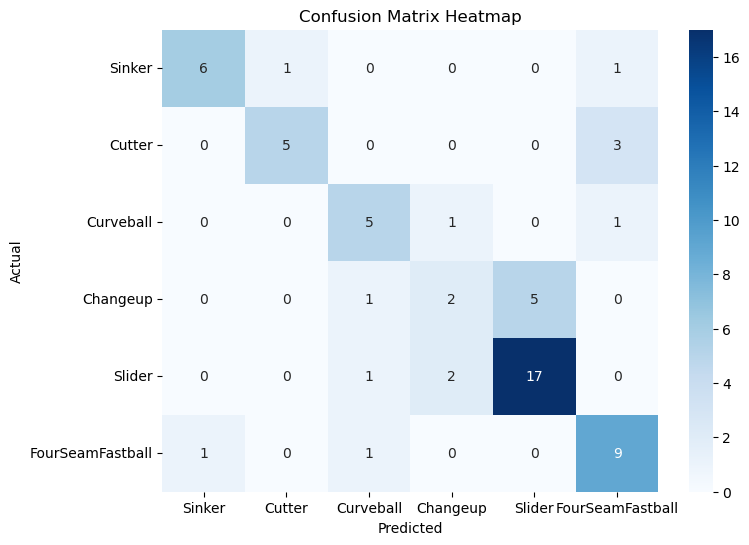

In [43]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(test_y, pred_y)

# get labels
pitch_type_data_options = list(set(pitch_type_data))

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=pitch_type_data_options, yticklabels=pitch_type_data_options)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

## Pitch Result Prediction
### Random Forest Classifier

In [44]:
# Read Data
hits_folder_path = '/Users/tiffanynguyen/wsd-data/wsd-hits'
no_hits_folder_path = '/Users/tiffanynguyen/wsd-data/wsd-nohit'
data = []

for filename in os.listdir(hits_folder_path):
    if filename.endswith('.jsonl'):
        file_path = os.path.join(hits_folder_path, filename)
        with open(file_path, 'r') as json_file:
            data.append(json.load(json_file))

for filename in os.listdir(no_hits_folder_path):
    if filename.endswith('.jsonl'):
        file_path = os.path.join(no_hits_folder_path, filename)
        with open(file_path, 'r') as json_file:
            data.append(json.load(json_file))

In [45]:
# Get intial speed, spin, and pitch type as parallel lists
pitch_type_data = []
pitch_speed_data = []
pitch_spin_data = []
pitch_result_data = []

for cur_data in data:
    if(cur_data['summary_acts']['pitch']['type'] and cur_data['summary_acts']['pitch']['speed']['mph'] and cur_data['summary_acts']['pitch']['spin']['rpm'] and cur_data['summary_acts']['pitch']['result']):
        pitch_type_data.append(cur_data['summary_acts']['pitch']['type'])
        pitch_speed_data.append(cur_data['summary_acts']['pitch']['speed']['mph'])
        pitch_spin_data.append(cur_data['summary_acts']['pitch']['spin']['rpm'])
        pitch_result_data.append(cur_data['summary_acts']['pitch']['result'])

In [46]:
data = {
    'Type': pitch_type_data,
    'Speed': pitch_speed_data,
    'Spin': pitch_spin_data
}
df = pd.DataFrame(data)

In [47]:
#One-Hot Encoding to handle string data in type
df_encoded = pd.get_dummies(df, columns=['Type'])

In [48]:
#divide data
train_x, test_x, train_y, test_y = train_test_split(df_encoded, pitch_result_data, test_size=0.2, random_state=33) #42

In [49]:
# Initialize and train the classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(train_x, train_y)

RandomForestClassifier(random_state=42)

In [50]:
pred_y = classifier.predict(test_x)
accuracy = accuracy_score(test_y, pred_y)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.45


### Logistic Regression

In [51]:
!pip install seaborn==0.13.0

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
# Feature scaling
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

In [54]:
classifier = LogisticRegression(random_state=42) #41
classifier.fit(train_x_scaled, train_y)

LogisticRegression(random_state=42)

In [55]:
pred_y = classifier.predict(test_x_scaled)
accuracy = accuracy_score(test_y, pred_y)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.45


In [56]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

[[ 6  0 21]
 [ 2  0  6]
 [ 4  1 22]]


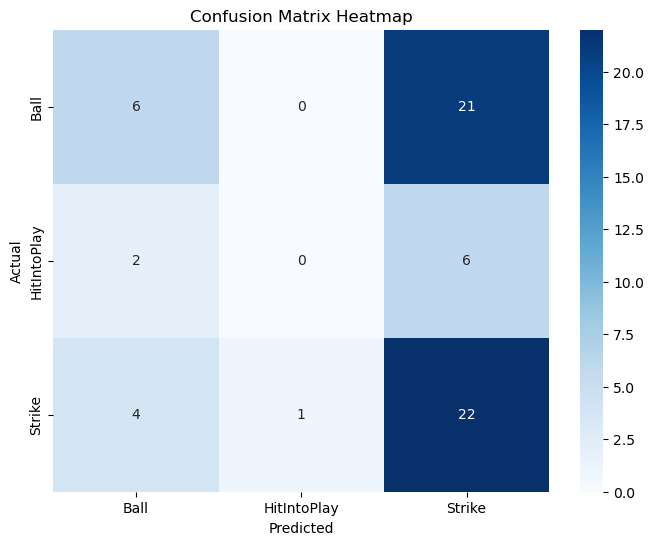

In [57]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(test_y, pred_y)
print(conf_matrix)

# get labels
pitch_result_data_options = sorted(list(set(pitch_result_data)))

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=pitch_result_data_options,
            yticklabels=pitch_result_data_options)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')

plt.show()

### Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
classifier = DecisionTreeClassifier(random_state=15)
classifier.fit(train_x_scaled, train_y)

DecisionTreeClassifier(random_state=15)

In [60]:
pred_y = classifier.predict(test_x_scaled)
accuracy = accuracy_score(test_y, pred_y)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.45


# Hit Examine Visualization

In [61]:
import os
import numpy as np
import pandas as pd
import json

In [62]:
hits_folder_path = '/Users/tiffanynguyen/wsd-data/wsd-hits'
no_hit_folder_path = '/Users/tiffanynguyen/wsd-data/wsd-nohit'
#hits_folder_path = '/Users/tiffanynguyen/wsd-data/wsd-hits'

#initialize dataframe
df = pd.DataFrame(columns=['Hit Type', 'Pitch Type', 'Pitch Speed'])

# categorize ground balls, line drives, power, pop ups
# exit velocity will tell if the ball was hard hit or not
"""
Ground ball: Lower than 10 degrees
Line drive: 10-25 degrees
Fly ball: 25-50 degrees
Pop up: Higher than 50 degrees
"""
# maybe - also if passed boundary 
def classify_hit_type(data):
    hit_type = 'none'
    #check null cases
    if ('summary_acts' in data and 'hit' in data['summary_acts'] and 'speed' in data['summary_acts']['hit'] and
    'events' in data and len(data['events']) != 0 and 'start' in data['events'][0]):
#         if data['summary_acts']['pitch']['result'] == "HitIntoPlay":
        # pop up
        if(data['events'][0]['start']['angle'][1] >= 50 ):
            hit_type = 'Pop Up'

        # power hit or pop fly depending on exit velocity
        if((data['events'][0]['start']['angle'][1] > 25 and data['events'][0]['start']['angle'][1] < 50 )):
            if (data['summary_acts']['hit']['speed']['mph'] >= 95):
                hit_type = 'Power'
            else: 
                hit_type = 'Fly Ball'


        # line drives: hard hit vs lightly hit
        if((data['events'][0]['start']['angle'][1] >= 10 and data['events'][0]['start']['angle'][1] <= 25 )):
            if (data['summary_acts']['hit']['speed']['mph'] >= 95):
                hit_type = 'Hard Hit Line Drive'
            else: 
                hit_type = 'Light Line Drive'

        # ground balls: hard hit vs lightly hit
        elif (data['events'][0]['start']['angle'][1] < 10 ):
            if (data['summary_acts']['hit']['speed']['mph'] >= 95):
                hit_type = 'Hard Hit Ground Ball'
            else: 
                hit_type = 'Light Ground Ball'

    return hit_type


#read files
for filename in os.listdir(hits_folder_path):
    if filename.endswith('.jsonl'):
        file_path = os.path.join(hits_folder_path, filename)
        with open(file_path, 'r') as json_file:
            data = json.load(json_file)
            row = {
                "Hit Type" : classify_hit_type(data),
                "Pitch Type" : data['summary_acts']['pitch']['type'],
                "Pitch Speed" : data['summary_acts']['pitch']['speed']['mph']
            }
            # you can remove this check if you want to add all data even if some of the fields is null
            if (row["Hit Type"] != 'none'
                and row["Pitch Type"] is not None and len(row["Pitch Type"]) > 0
                and row["Pitch Speed"] is not None):
                df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)

# hit_t = []
# pitch_t = []
# pitch_s = []
for filename in os.listdir(no_hit_folder_path):
    if filename.endswith('.jsonl'):
        file_path = os.path.join(no_hit_folder_path, filename)
        with open(file_path, 'r') as json_file:
            data = json.load(json_file)
            row = {
                "Hit Type" : classify_hit_type(data),
                "Pitch Type" : data['summary_acts']['pitch']['type'],
                "Pitch Speed" : data['summary_acts']['pitch']['speed']['mph']
            }
            # you can remove this check if you want to add all data even if some of the fields is null
            if (row["Hit Type"] != 'none'
                and row["Pitch Type"] is not None and len(row["Pitch Type"]) > 0
                and row["Pitch Speed"] is not None):
                df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)
                # hit_t.append(classify_hit_type(data))
                # pitch_t.append(data['summary_acts']['pitch']['type'])
                # pitch_s.append(data['summary_acts']['pitch']['speed']['mph'])
            


/var/folders/ck/w49wycq96pvcx0hxmdh1ng880000gn/T/ipykernel_45905/3322291489.py:67: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [63]:
display(df)

,Hit Type,Pitch Type,Pitch Speed
0,Light Ground Ball,Sinker,94.0
1,Hard Hit Ground Ball,Changeup,86.0
2,Light Ground Ball,Slider,80.0
3,Hard Hit Ground Ball,Sinker,90.0
4,Hard Hit Line Drive,Changeup,86.0
...,...,...,...
74,Hard Hit Ground Ball,FourSeamFastball,96.0
75,Fly Ball,Sinker,91.0
76,Light Ground Ball,FourSeamFastball,91.0
77,Light Ground Ball,Sinker,95.0


### Pitch Type and Hit Type Heatmap

In [64]:
count_df = df.groupby(['Hit Type', 'Pitch Type']).size().reset_index(name='count')
pivot_df = count_df.pivot(index='Hit Type', columns='Pitch Type', values='count').fillna(0)

display(pivot_df)

Pitch Type,Changeup,Curveball,Cutter,FourSeamFastball,Sinker,Slider
Hit Type,,,,,,
Fly Ball,1.0,0.0,1.0,3.0,8.0,3.0
Hard Hit Ground Ball,1.0,1.0,1.0,3.0,6.0,2.0
Hard Hit Line Drive,1.0,0.0,0.0,1.0,2.0,0.0
Light Ground Ball,3.0,3.0,0.0,1.0,8.0,4.0
Light Line Drive,0.0,1.0,1.0,5.0,2.0,5.0
Pop Up,1.0,1.0,1.0,0.0,3.0,4.0
Power,0.0,0.0,0.0,0.0,1.0,1.0


In [65]:
import pandas as pd
import plotly.express as px

In [66]:
fig = px.imshow(pivot_df, text_auto=True, aspect="auto",
                labels=dict(x="Pitch Type", y="Hit Type", color="Count"),
                title="Heatmap of Hit Type vs Pitch Type",
                width=600,
                height=500)
fig.show()

### Hit Type and Pitch Speed Histogram

In [67]:
fig = px.histogram(df, x="Pitch Speed", color="Hit Type", title="Pitch Speed by Hit Type")
fig.update_xaxes(title_text="Spin (rpm)")
fig.show()

### Prediction

In [68]:
df["Good"] = ~(df["Hit Type"] == "Hard Hit Ground Ball") & ~(df["Hit Type"] == "Hard Hit Line Drive")

In [69]:
display(df)

,Hit Type,Pitch Type,Pitch Speed,Good
0,Light Ground Ball,Sinker,94.0,True
1,Hard Hit Ground Ball,Changeup,86.0,False
2,Light Ground Ball,Slider,80.0,True
3,Hard Hit Ground Ball,Sinker,90.0,False
4,Hard Hit Line Drive,Changeup,86.0,False
...,...,...,...,...
74,Hard Hit Ground Ball,FourSeamFastball,96.0,False
75,Fly Ball,Sinker,91.0,True
76,Light Ground Ball,FourSeamFastball,91.0,True
77,Light Ground Ball,Sinker,95.0,True


In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
#Label Encoder to handle string data in type
label_encoder = LabelEncoder()
df['Pitch Type Encoded'] = label_encoder.fit_transform(df['Pitch Type'])
display(df)

,Hit Type,Pitch Type,Pitch Speed,Good,Pitch Type Encoded
0,Light Ground Ball,Sinker,94.0,True,4
1,Hard Hit Ground Ball,Changeup,86.0,False,0
2,Light Ground Ball,Slider,80.0,True,5
3,Hard Hit Ground Ball,Sinker,90.0,False,4
4,Hard Hit Line Drive,Changeup,86.0,False,0
...,...,...,...,...,...
74,Hard Hit Ground Ball,FourSeamFastball,96.0,False,3
75,Fly Ball,Sinker,91.0,True,4
76,Light Ground Ball,FourSeamFastball,91.0,True,3
77,Light Ground Ball,Sinker,95.0,True,4


In [72]:
#divide data
features = df[["Pitch Type Encoded", "Pitch Speed"]]
target = df["Good"]
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.2, random_state=38) #40, 38

Accuracy: 0.81


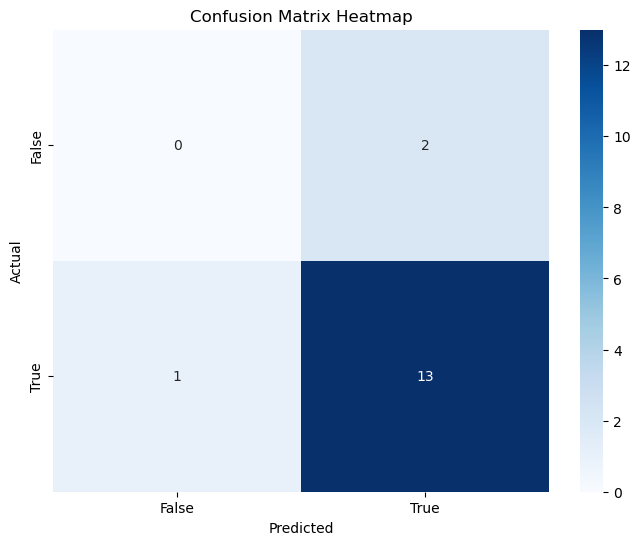

In [73]:
# Initialize and train the classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(train_x, train_y)

pred_y = classifier.predict(test_x)
accuracy = accuracy_score(test_y, pred_y)
print(f"Accuracy: {accuracy:.2f}")

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_y, pred_y)

result_data_options = sorted(list(set(df["Good"])))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=result_data_options,
            yticklabels=result_data_options)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')

plt.show()

Accuracy: 0.88


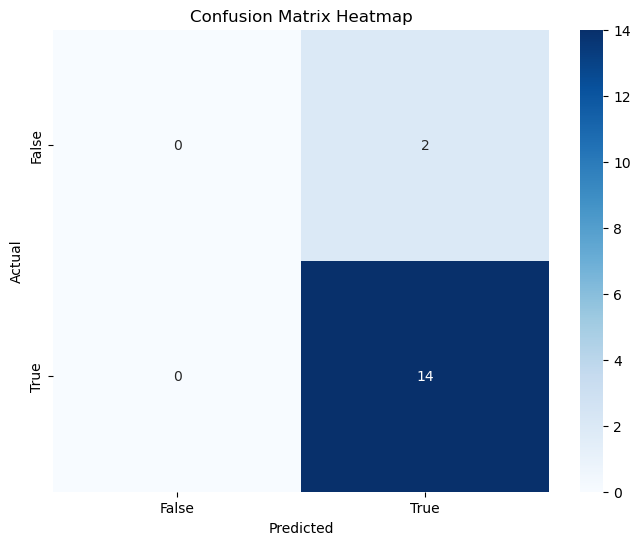

In [74]:
classifier = LogisticRegression(random_state=42)
classifier.fit(train_x, train_y)

pred_y = classifier.predict(test_x)
accuracy = accuracy_score(test_y, pred_y)
print(f"Accuracy: {accuracy:.2f}")

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_y, pred_y)

result_data_options = sorted(list(set(df["Good"])))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=result_data_options,
            yticklabels=result_data_options)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')

plt.show()

In [75]:
pitch_type_encoded = eval(input("Enter Encoded pitch type: "))
pitch_speed = eval(input("Enter pitch Speed: "))

user_df = pd.DataFrame({
    "Pitch Speed": [pitch_speed],
    "Pitch Type Encoded": [pitch_type_encoded]
})

# Ensure the columns are in the same order as during training
prediction_features = user_df[["Pitch Type Encoded", "Pitch Speed"]]

# Make predictions
user_pred_y = classifier.predict(prediction_features)

if(user_pred_y):
    print("That was good for the pitcher")
else:
    print("that was bad for the pitcher")

Enter Encoded pitch type: 3
Enter pitch Speed: 150
that was bad for the pitcher


In [76]:
# hits_folder_path = '/Users/madelinefollosco/Documents/GitHub/wsd-data/wsd-hits'
# no_hit_folder_path = '/Users/madelinefollosco/Documents/GitHub/wsd-data/wsd-nohit'
#hits_folder_path = '/Users/tiffanynguyen/wsd-data/wsd-hits'

#initialize dataframe
df = pd.DataFrame(columns=['Hit Type', 'Pitch Type', 'Pitch Speed'])

# categorize ground balls, line drives, power, pop ups
# exit velocity will tell if the ball was hard hit or not
"""
Ground ball: Lower than 10 degrees
Line drive: 10-25 degrees
Fly ball: 25-50 degrees
Pop up: Higher than 50 degrees
"""
nons = []
count = 0
# maybe - also if passed boundary 
def classify_hit_type(data):
    hit_type = 'none'
    #check null cases
    if ('summary_acts' in data and 'hit' in data['summary_acts'] and 'speed' in data['summary_acts']['hit'] and
    'events' in data and len(data['events']) != 0 and 'start' in data['events'][0]):
        if data['summary_acts']['pitch']['result'] == "HitIntoPlay":
            # pop up
            if(data['events'][0]['start']['angle'][1] >= 50 ):
                hit_type = 'Pop Up'
                
            # power hit or pop fly depending on exit velocity
            if((data['events'][0]['start']['angle'][1] > 25 and data['events'][0]['start']['angle'][1] < 50 )):
                if (data['summary_acts']['hit']['speed']['mph'] >= 95):
                    hit_type = 'Power'
                else: 
                    hit_type = 'Fly Ball'
                    

            # line drives: hard hit vs lightly hit
            if((data['events'][0]['start']['angle'][1] >= 10 and data['events'][0]['start']['angle'][1] <= 25 )):
                if (data['summary_acts']['hit']['speed']['mph'] >= 95):
                    hit_type = 'Hard Hit Line Drive'
                else: 
                    hit_type = 'Light Line Drive'
    
            # ground balls: hard hit vs lightly hit
            elif (data['events'][0]['start']['angle'][1] < 10 ):
                if (data['summary_acts']['hit']['speed']['mph'] >= 95):
                    hit_type = 'Hard Hit Ground Ball'
                else: 
                    hit_type = 'Light Ground Ball'
    elif data['summary_acts']['pitch']['result'] == "Strike":
        hit_type = 'Strike'

    # else: 
    #     nons.append(data['summary_acts']['pitch']['result'])

    return hit_type


#read files
for filename in os.listdir(hits_folder_path):
    if filename.endswith('.jsonl'):
        file_path = os.path.join(hits_folder_path, filename)
        with open(file_path, 'r') as json_file:
            data = json.load(json_file)
            row = {
                "Hit Type" : classify_hit_type(data),
                "Pitch Type" : data['summary_acts']['pitch']['type'],
                "Pitch Speed" : data['summary_acts']['pitch']['speed']['mph']
            }
            # you can remove this check if you want to add all data even if some of the fields is null
            if (row["Hit Type"] != 'none'
                and row["Pitch Type"] is not None and len(row["Pitch Type"]) > 0
                and row["Pitch Speed"] is not None):
                df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)

# hit_t = []
# pitch_t = []
# pitch_s = []
for filename in os.listdir(no_hit_folder_path):
    if filename.endswith('.jsonl'):
        file_path = os.path.join(no_hit_folder_path, filename)
        with open(file_path, 'r') as json_file:
            data = json.load(json_file)
            row = {
                "Hit Type" : classify_hit_type(data),
                "Pitch Type" : data['summary_acts']['pitch']['type'],
                "Pitch Speed" : data['summary_acts']['pitch']['speed']['mph']
            }
            # you can remove this check if you want to add all data even if some of the fields is null
            if (row["Hit Type"] != 'none'
                and row["Pitch Type"] is not None and len(row["Pitch Type"]) > 0
                and row["Pitch Speed"] is not None):
                df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)
                # hit_t.append(classify_hit_type(data))
                # pitch_t.append(data['summary_acts']['pitch']['type'])
                # pitch_s.append(data['summary_acts']['pitch']['speed']['mph'])
            
# for ind in df.index:
#     if(df['Hit Type'][ind] == 'Power' or df['Hit Type'][ind] == 'Fly Ball' or df['Hit Type'][ind] == 'Hard Hit Line Drive'):
#         df['P_Outcome'] = 'Bad'
#     else: df['P_Outcome'] = 'Good'

df["Good"] = ~(df["Hit Type"] == "Power") & ~(df["Hit Type"] == "Hard Hit Line Drive") & ~(df["Hit Type"] == "Fly Ball") & ~(df["Hit Type"] == "Hard Hit Ground Ball")

/var/folders/ck/w49wycq96pvcx0hxmdh1ng880000gn/T/ipykernel_45905/1713594908.py:74: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [77]:
display(df)
df.to_csv('Hit_vs_Pitch analysis.csv')

,Hit Type,Pitch Type,Pitch Speed,Good
0,Strike,Slider,84.0,True
1,Strike,Curveball,79.0,True
2,Strike,Curveball,78.0,True
3,Light Ground Ball,Sinker,94.0,True
4,Strike,Curveball,79.0,True
...,...,...,...,...
148,Strike,Sinker,90.0,True
149,Strike,FourSeamFastball,91.0,True
150,Strike,Changeup,84.0,True
151,Strike,Curveball,77.0,True


In [241]:
#Label Encoder to handle string data in type
label_encoder = LabelEncoder()
df['Pitch Type Encoded'] = label_encoder.fit_transform(df['Pitch Type'])
display(df)

,Hit Type,Pitch Type,Pitch Speed,Good,Pitch Type Encoded
0,Strike,Slider,84.0,True,5
1,Strike,Curveball,79.0,True,1
2,Strike,Curveball,78.0,True,1
3,Light Ground Ball,Sinker,94.0,True,4
4,Strike,Curveball,79.0,True,1
...,...,...,...,...,...
148,Strike,Sinker,90.0,True,4
149,Strike,FourSeamFastball,91.0,True,3
150,Strike,Changeup,84.0,True,0
151,Strike,Curveball,77.0,True,1


In [272]:
#divide data
features = df[["Pitch Type Encoded", "Pitch Speed"]]
target = df["Good"]
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.2, random_state=38) #41, 38, 18

Accuracy: 0.87


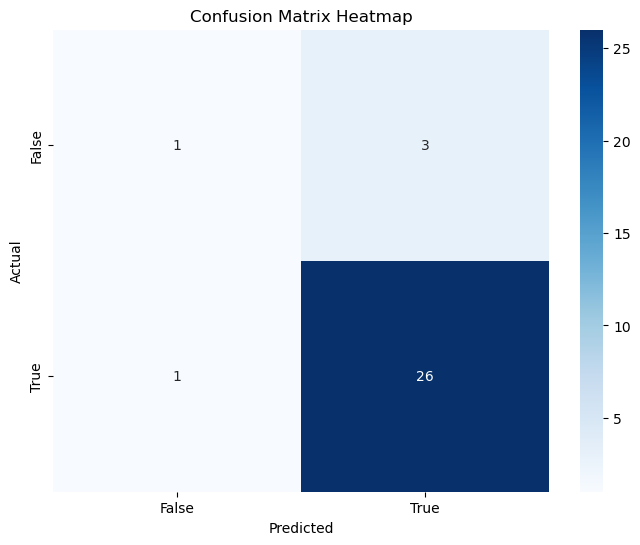

In [273]:
# Initialize and train the classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(train_x, train_y)

pred_y = classifier.predict(test_x)
accuracy = accuracy_score(test_y, pred_y)
print(f"Accuracy: {accuracy:.2f}")

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_y, pred_y)

result_data_options = sorted(list(set(df["Good"])))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=result_data_options,
            yticklabels=result_data_options)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')

plt.show()

Accuracy: 0.87


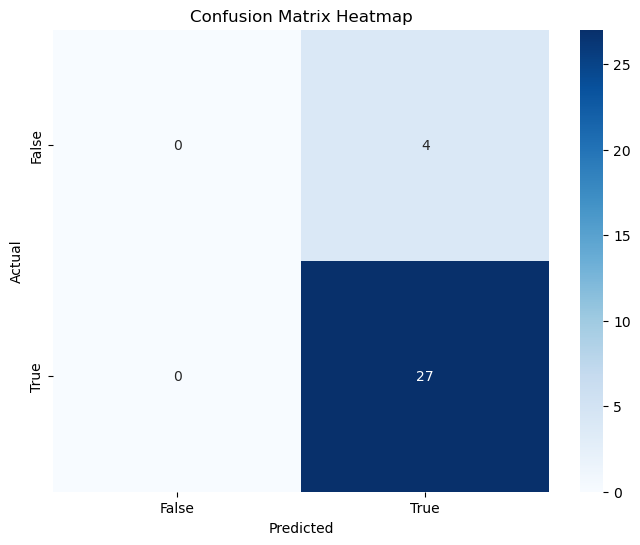

In [274]:
classifier = LogisticRegression(random_state=42)
classifier.fit(train_x, train_y)

pred_y = classifier.predict(test_x)
accuracy = accuracy_score(test_y, pred_y)
print(f"Accuracy: {accuracy:.2f}")

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_y, pred_y)

result_data_options = sorted(list(set(df["Good"])))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=result_data_options,
            yticklabels=result_data_options)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')

plt.show()